NYC Real Estate Sales

# Final Project
                                                    

## Choose different models learned in DSC 478, and select the best one to predict the Sale Price of the property. We will split the data into training and testing to see which model gives us the best result.

###### For this project I have created a new column called New_Sales_Price based on the sale Price, in which it divides the data into categories (this would be our target variable). 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

nyc = pd.read_csv("nyc-rolling-sales .csv", sep = ',', na_values = [' -  '])
nyc.head(5)

Unnamed: 0  BOROUGH   NEIGHBORHOOD  \
0           4        1  ALPHABET CITY   
1           5        1  ALPHABET CITY   
2           6        1  ALPHABET CITY   
3           7        1  ALPHABET CITY   
4           8        1  ALPHABET CITY   

                       BUILDING_CLASS_CATEGORY TAX_CLASS_AT_PRESENT  BLOCK  \
0  07 RENTALS - WALKUP APARTMENTS                                2A    392   
1  07 RENTALS - WALKUP APARTMENTS                                 2    399   
2  07 RENTALS - WALKUP APARTMENTS                                 2    399   
3  07 RENTALS - WALKUP APARTMENTS                                2B    402   
4  07 RENTALS - WALKUP APARTMENTS                                2A    404   

   LOT EASE-MENT BUILDING_CLASS_AT_PRESENT                 ADDRESS  ...  \
0    6                                  C2            153 AVENUE B  ...   
1   26                                  C7   234 EAST 4TH   STREET  ...   
2   39                                  C7   197 EAST 3RD   STREET  ...   
3   21                                  C4     154 EAST 7TH STREET  ...   
4   55                                  C2  301 EAST 10TH   STREET  ...   

  TOTAL_UNITS  LAND_SQUARE_FEET  GROSS_SQUARE_FEET  YEAR_BUILT  \
0           5            1633.0             6440.0        1900   
1          31            4616.0            18690.0        1900   
2          17            2212.0             7803.0        1900   
3          10            2272.0             6794.0        1913   
4           6            2369.0             4615.0        1900   

   TAX_CLASS_AT_TIME_OF_SALE  BUILDING_CLASS_AT_TIME_OF_SALE  SALE_PRICE  \
0                          2                              C2     6625000   
1                          2                              C7           0   
2                          2                              C7           0   
3                          2                              C4     3936272   
4                          2                              C2     8000000   

   New_Sale_Date1  New_Sale_Date New_Sales_Price  
0          Jul-17           2017           >1,1M  
1          Dec-16           2016          < 397K  
2          Dec-16           2016          < 397K  
3          Sep-16           2016           >1,1M  
4          Nov-16           2016           >1,1M  

[5 rows x 24 columns]

In [2]:
# The dataset contains 84,548 rows, and 22 columns.

nyc.shape

(84548, 24)

In [3]:
# Running through the dataset I have determined the following:
# The numeric variable Land Square Feet has null values.
# The numeric vaariable Gross Square Feet has null values.
# The numeric variable Sale Price has has 0 values.
# These variables will need to be watched.
nyc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Unnamed: 0                      84548 non-null  int64  
 1   BOROUGH                         84548 non-null  int64  
 2   NEIGHBORHOOD                    84548 non-null  object 
 3   BUILDING_CLASS_CATEGORY         84548 non-null  object 
 4   TAX_CLASS_AT_PRESENT            84548 non-null  object 
 5   BLOCK                           84548 non-null  int64  
 6   LOT                             84548 non-null  int64  
 7   EASE-MENT                       84548 non-null  object 
 8   BUILDING_CLASS_AT_PRESENT       84548 non-null  object 
 9   ADDRESS                         84548 non-null  object 
 10  APARTMENT_NUMBER                84548 non-null  object 
 11  ZIP_CODE                        84548 non-null  int64  
 12  RESIDENTIAL_UNITS               

In [4]:
# Since the dataset is large, I'll remove any null values for Land Square Feet.
nyc.drop(nyc[nyc.LAND_SQUARE_FEET.isnull()].index, axis = 0, inplace = True)

In [5]:
# Since the dataset is large, I'll remove any null values for Gross Square Feet.
nyc.drop(nyc[nyc.GROSS_SQUARE_FEET.isnull()].index, axis = 0, inplace = True)

In [6]:
# Since the dataset is large, I'll remove any null values for Sale Price.
nyc.drop(nyc[nyc.SALE_PRICE.isnull()].index, axis = 0, inplace = True)

In [7]:
# Since the easement and apartment numbers are null we will be removing those variables.
# Since the address column unnamed isn't necessary for my analysis I will be removing it.
# Using a dummy varaible for the address wouldn't make much sense.
nyc.drop(columns=['EASE-MENT', 'Unnamed: 0', 'ADDRESS', 'APARTMENT_NUMBER', 'BUILDING_CLASS_AT_PRESENT', 'BUILDING_CLASS_AT_TIME_OF_SALE'], inplace = True)

In [8]:
nyc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56930 entries, 0 to 84547
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   BOROUGH                    56930 non-null  int64  
 1   NEIGHBORHOOD               56930 non-null  object 
 2   BUILDING_CLASS_CATEGORY    56930 non-null  object 
 3   TAX_CLASS_AT_PRESENT       56930 non-null  object 
 4   BLOCK                      56930 non-null  int64  
 5   LOT                        56930 non-null  int64  
 6   ZIP_CODE                   56930 non-null  int64  
 7   RESIDENTIAL_UNITS          56930 non-null  int64  
 8   COMMERCIAL_UNITS           56930 non-null  int64  
 9   TOTAL_UNITS                56930 non-null  int64  
 10  LAND_SQUARE_FEET           56930 non-null  float64
 11  GROSS_SQUARE_FEET          56930 non-null  float64
 12  YEAR_BUILT                 56930 non-null  int64  
 13  TAX_CLASS_AT_TIME_OF_SALE  56930 non-null  int

We are gonna look a little bit more into our variables.

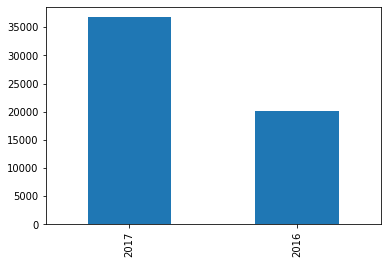

In [9]:
nyc["New_Sale_Date"].value_counts().plot(kind = 'bar')

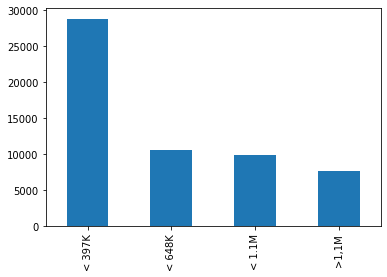

In [10]:
nyc["New_Sales_Price"].value_counts().plot(kind = 'bar')

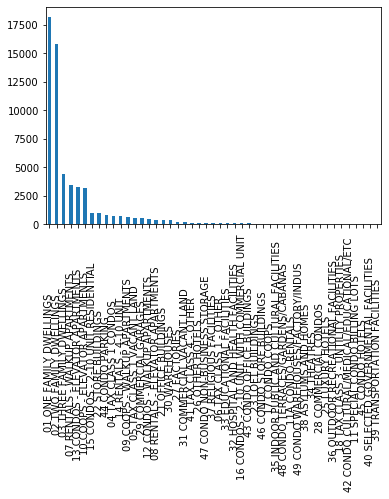

In [11]:
nyc["BUILDING_CLASS_CATEGORY"].value_counts().plot(kind = 'bar')

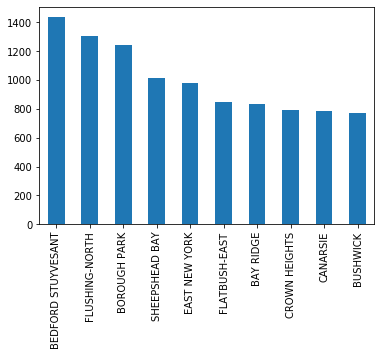

In [12]:
# Let's see if there is anything in peculiar with my variables
nyc["NEIGHBORHOOD"].value_counts().head(10).plot(kind = 'bar')



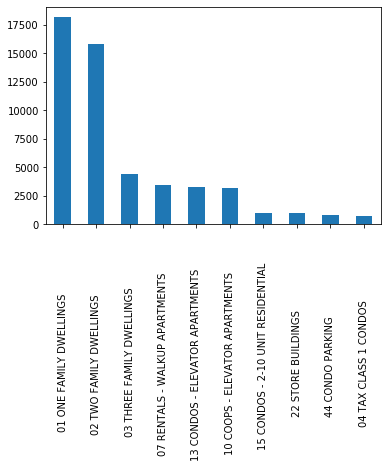

In [13]:
nyc["BUILDING_CLASS_CATEGORY"].value_counts().head(10).plot(kind = 'bar')

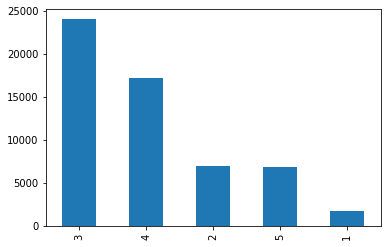

In [14]:
nyc['BOROUGH'].value_counts().plot(kind = 'bar')

In [15]:
neighborhood_slprice = pd.crosstab(nyc["NEIGHBORHOOD"], nyc["New_Sales_Price"])
neighborhood_slprice

New_Sales_Price     < 1.1M  < 397K  < 648K  >1,1M
NEIGHBORHOOD                                     
AIRPORT LA GUARDIA       2       2       0      1
ALPHABET CITY            0       9       0     11
ANNADALE                41      67      46      7
ARDEN HEIGHTS            3     147     101      0
ARROCHAR                 3      16      15      1
...                    ...     ...     ...    ...
WOODHAVEN              100     160     137      5
WOODLAWN                 5      48      29      3
WOODROW                 19      55      54      3
WOODSIDE                42     104      11     30
WYCKOFF HEIGHTS         15      55       5     31

[253 rows x 4 columns]

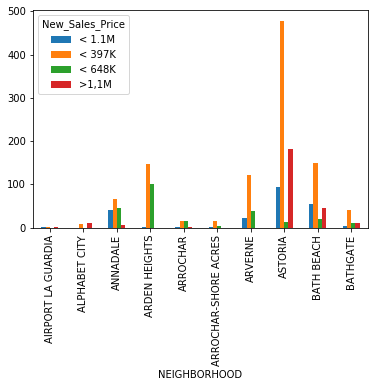

In [16]:
plt.show(neighborhood_slprice.head(10).plot(kind="bar"))

In [17]:
zip_slprice = pd.crosstab(nyc["ZIP_CODE"], nyc["New_Sales_Price"])
zip_slprice

New_Sales_Price  < 1.1M  < 397K  < 648K  >1,1M
ZIP_CODE                                      
0                    78     203      41     72
10001                 0      21       0     21
10002                 0      20       0     29
10003                 0      38       2     30
10004                 0       1       0      2
...                 ...     ...     ...    ...
11436                23     191      90      1
11691                36     213      88     13
11692                23      94      32      0
11693                 8      78      20      3
11694                64      77      24     18

[182 rows x 4 columns]

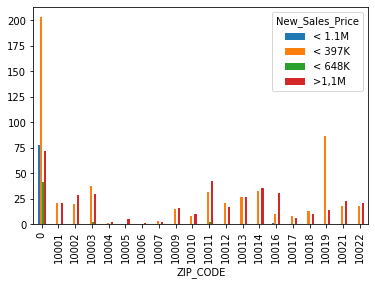

In [18]:
plt.show(zip_slprice.head(20).plot(kind = "bar"))

In [19]:
# The analysis thus far has shown the majority of my data being concentrated on one, two, and/or three family dwellings.
build_slprice = pd.crosstab(nyc["BUILDING_CLASS_CATEGORY"], nyc["New_Sales_Price"])
build_slprice


New_Sales_Price                               < 1.1M  < 397K  < 648K  >1,1M
BUILDING_CLASS_CATEGORY                                                    
01 ONE FAMILY DWELLINGS                         3200    8841    5105   1016
02 TWO FAMILY DWELLINGS                         3472    7603    3086   1611
03 THREE FAMILY DWELLINGS                        720    2365     518    777
04 TAX CLASS 1 CONDOS                            154     362     145     78
05 TAX CLASS 1 VACANT LAND                        31     412      37     50
06 TAX CLASS 1 - OTHER                             3      78       3      8
07 RENTALS - WALKUP APARTMENTS                   271    1831     154   1203
08 RENTALS - ELEVATOR APARTMENTS                   0     179       2    196
09 COOPS - WALKUP APARTMENTS                     122     285     123     90
10 COOPS - ELEVATOR APARTMENTS                   263    2328     514     83
11 SPECIAL CONDO BILLING LOTS                      0       1       1      0
11A CONDO-RENTALS                                  5      16       0      7
12 CONDOS - WALKUP APARTMENTS                    130     183      85     62
13 CONDOS - ELEVATOR APARTMENTS                  913     952     441    951
14 RENTALS - 4-10 UNIT                            67     371      27    205
15 CONDOS - 2-10 UNIT RESIDENTIAL                322     221     201    212
16 CONDOS - 2-10 UNIT WITH COMMERCIAL UNIT         5      45       1      5
17 CONDO COOPS                                     7      13      10      5
18 TAX CLASS 3 - UNTILITY PROPERTIES               0       2       0      0
21 OFFICE BUILDINGS                               27     140      28    155
22 STORE BUILDINGS                                87     502      46    296
23 LOFT BUILDINGS                                  0      26       0     20
25 LUXURY HOTELS                                   0       2       0      8
26 OTHER HOTELS                                    2      81       0     30
27 FACTORIES                                       9     102       5     83
28 COMMERCIAL CONDOS                               0       8       1      1
29 COMMERCIAL GARAGES                             43     298      25    131
30 WAREHOUSES                                     14     165      13    133
31 COMMERCIAL VACANT LAND                         14     136       9     29
32 HOSPITAL AND HEALTH FACILITIES                  4      31       0     24
33 EDUCATIONAL FACILITIES                          4      45       3     17
34 THEATRES                                        0       7       0      5
35 INDOOR PUBLIC AND CULTURAL FACILITIES           2      20       1      9
36 OUTDOOR RECREATIONAL FACILITIES                 0       2       0      1
37 RELIGIOUS FACILITIES                           13      46       7     33
38 ASYLUMS AND HOMES                               0      11       1     13
39 TRANSPORTATION FACILITIES                       0       2       0      0
40 SELECTED GOVERNMENTAL FACILITIES                0       1       0      1
41 TAX CLASS 4 - OTHER                             5      98       7     17
42 CONDO CULTURAL/MEDICAL/EDUCATIONAL/ETC          0       1       1      0
43 CONDO OFFICE BUILDINGS                          8      29      11      7
44 CONDO PARKING                                   4     774       2      3
45 CONDO HOTELS                                    0       0       0      2
46 CONDO STORE BUILDINGS                           1      26       2     15
47 CONDO NON-BUSINESS STORAGE                      0     103       0      0
48 CONDO TERRACES/GARDENS/CABANAS                  0      29       0      2
49 CONDO WAREHOUSES/FACTORY/INDUS                  0      26       0      0

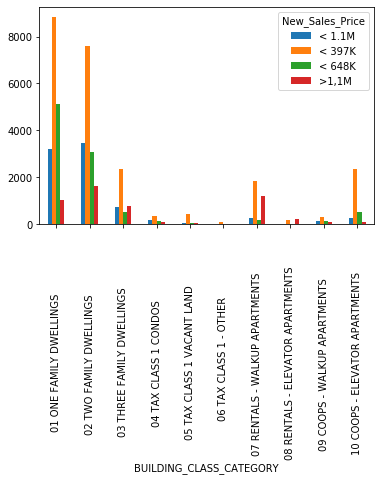

In [20]:
# From this plot, I've determined that the majority of household values fall between $0 -  $648K.
plt.show(build_slprice.head(10).plot(kind = "bar"))

In [21]:
# Removing variables that have a value of $0 or $1.
# Adding a minimum requirement of 50K for the Sale Price.
real_price = nyc['SALE_PRICE'] > 49999
nyc_real = nyc[real_price]
nyc_real.shape 

(36497, 18)

So, After having 84,548 observations, I ended up with 36,497 after taking all the null values from all the columns.

In [22]:
nyc_records = nyc_real[['BOROUGH','NEIGHBORHOOD','BUILDING_CLASS_CATEGORY','TAX_CLASS_AT_PRESENT','BLOCK','LOT','ZIP_CODE', 'RESIDENTIAL_UNITS', 'COMMERCIAL_UNITS', 'TOTAL_UNITS', 'LAND_SQUARE_FEET', 'GROSS_SQUARE_FEET', 'YEAR_BUILT', 'TAX_CLASS_AT_TIME_OF_SALE', 'New_Sale_Date']]
nyc_records.head()

BOROUGH   NEIGHBORHOOD                      BUILDING_CLASS_CATEGORY  \
0        1  ALPHABET CITY  07 RENTALS - WALKUP APARTMENTS                
3        1  ALPHABET CITY  07 RENTALS - WALKUP APARTMENTS                
4        1  ALPHABET CITY  07 RENTALS - WALKUP APARTMENTS                
6        1  ALPHABET CITY  07 RENTALS - WALKUP APARTMENTS                
9        1  ALPHABET CITY  08 RENTALS - ELEVATOR APARTMENTS              

  TAX_CLASS_AT_PRESENT  BLOCK  LOT  ZIP_CODE  RESIDENTIAL_UNITS  \
0                   2A    392    6     10009                  5   
3                   2B    402   21     10009                 10   
4                   2A    404   55     10009                  6   
6                   2B    406   32     10009                  8   
9                    2    387  153     10009                 24   

   COMMERCIAL_UNITS  TOTAL_UNITS  LAND_SQUARE_FEET  GROSS_SQUARE_FEET  \
0                 0            5            1633.0             6440.0   
3                 0           10            2272.0             6794.0   
4                 0            6            2369.0             4615.0   
6                 0            8            1750.0             4226.0   
9                 0           24            4489.0            18523.0   

   YEAR_BUILT  TAX_CLASS_AT_TIME_OF_SALE  New_Sale_Date  
0        1900                          2           2017  
3        1913                          2           2016  
4        1900                          2           2016  
6        1920                          2           2016  
9        1920                          2           2016

In [23]:
nyc_target = nyc_real.New_Sales_Price
nyc_target.head(10)

0      >1,1M
3      >1,1M
4      >1,1M
6      >1,1M
9      >1,1M
11     >1,1M
22     >1,1M
172    >1,1M
173    >1,1M
174    >1,1M
Name: New_Sales_Price, dtype: object

In [24]:
# So after cleaning out empty and unnecessary columns, we can see a total of 36,497 observations, 15 columns, and 1 target variable.
# This new target variable is my New Sale price.
nyc_records.shape

(36497, 15)

In [25]:
# Converting my columns into dummy variables.
nyc_records_dumm = pd.get_dummies(nyc_records)
nyc_records_dumm.head(10)

BOROUGH  BLOCK  LOT  ZIP_CODE  RESIDENTIAL_UNITS  COMMERCIAL_UNITS  \
0          1    392    6     10009                  5                 0   
3          1    402   21     10009                 10                 0   
4          1    404   55     10009                  6                 0   
6          1    406   32     10009                  8                 0   
9          1    387  153     10009                 24                 0   
11         1    400   21     10009                 10                 0   
22         1    376   14     10009                 24                 0   
172        1    391   19     10009                  3                 1   
173        1    393    4     10009                  4                 1   
174        1    394    5     10009                  5                 1   

     TOTAL_UNITS  LAND_SQUARE_FEET  GROSS_SQUARE_FEET  YEAR_BUILT  ...  \
0              5            1633.0             6440.0        1900  ...   
3             10            2272.0             6794.0        1913  ...   
4              6            2369.0             4615.0        1900  ...   
6              8            1750.0             4226.0        1920  ...   
9             24            4489.0            18523.0        1920  ...   
11            10            3717.0            12350.0        2009  ...   
22            24            4131.0            16776.0        1928  ...   
172            4            1520.0             3360.0        1910  ...   
173            5            2201.0             5608.0        1900  ...   
174            6            1779.0             3713.0        1910  ...   

     TAX_CLASS_AT_PRESENT_   TAX_CLASS_AT_PRESENT_1  TAX_CLASS_AT_PRESENT_1A  \
0                         0                       0                        0   
3                         0                       0                        0   
4                         0                       0                        0   
6                         0                       0                        0   
9                         0                       0                        0   
11                        0                       0                        0   
22                        0                       0                        0   
172                       0                       0                        0   
173                       0                       0                        0   
174                       0                       0                        0   

     TAX_CLASS_AT_PRESENT_1B  TAX_CLASS_AT_PRESENT_1C  TAX_CLASS_AT_PRESENT_2  \
0                          0                        0                       0   
3                          0                        0                       0   
4                          0                        0                       0   
6                          0                        0                       0   
9                          0                        0                       1   
11                         0                        0                       0   
22                         0                        0                       1   
172                        0                        0                       0   
173                        0                        0                       0   
174                        0                        0                       0   

     TAX_CLASS_AT_PRESENT_2A  TAX_CLASS_AT_PRESENT_2B  \
0                          1                        0   
3                          0                        1   
4                          1                        0   
6                          0                        1   
9                          0                        0   
11                         0                        1   
22                         0                        0   
172                        1                        0   
173                        1                        0   
174                  

In [26]:
# After converting the columns into dummy variables, we have a total of 328 columns and 36,497 rows.
# This should always be the same.
nyc_records_dumm.shape

(36497, 317)

In [27]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [28]:
nyc_records_dumm.describe().T

count          mean           std     min      25%      50%      75%        max
BOROUGH                                             36497.0      3.377510      0.961140     1.0      3.0      3.0      4.0        5.0
BLOCK                                               36497.0   5139.899197   3632.526621     1.0   2135.0   4681.0   7273.0    16319.0
LOT                                                 36497.0    222.704441    476.392856     1.0     21.0     44.0     93.0     7501.0
ZIP_CODE                                            36497.0  10944.771488    990.569763     0.0  10466.0  11218.0  11358.0    11694.0
RESIDENTIAL_UNITS                                   36497.0      2.455791     17.762742     0.0      1.0      1.0      2.0     1844.0
COMMERCIAL_UNITS                                    36497.0      0.258405     12.565656     0.0      0.0      0.0      0.0     2261.0
TOTAL_UNITS                                         36497.0      2.717621     21.883746     0.0      1.0      1.0      2.0     2261.0
LAND_SQUARE_FEET                                    36497.0   3375.013837  33786.265730     0.0   1395.0   2200.0   3267.0  4228300.0
GROSS_SQUARE_FEET                                   36497.0   3410.462257  29842.805334     0.0    881.0   1550.0   2340.0  3750565.0
YEAR_BUILT                                          36497.0   1855.065403    411.992621     0.0   1920.0   1931.0   1962.0     2017.0
TAX_CLASS_AT_TIME_OF_SALE                           36497.0      1.402636      0.725549     1.0      1.0      1.0      2.0        4.0
New_Sale_Date                                       36497.0   2016.653725      0.475789  2016.0   2016.0   2017.0   2017.0     2017.0
NEIGHBORHOOD_AIRPORT LA GUARDIA                     36497.0      0.000110      0.010468     0.0      0.0      0.0      0.0        1.0
NEIGHBORHOOD_ALPHABET CITY                          36497.0      0.000301      0.017358     0.0      0.0      0.0      0.0        1.0
NEIGHBORHOOD_ANNADALE                               36497.0      0.002877      0.053561     0.0      0.0      0.0      0.0        1.0
NEIGHBORHOOD_ARDEN HEIGHTS                          36497.0      0.006083      0.077755     0.0      0.0      0.0      0.0        1.0
NEIGHBORHOOD_ARROCHAR                               36497.0      0.000658      0.025635     0.0      0.0      0.0      0.0        1.0
NEIGHBORHOOD_ARROCHAR-SHORE ACRES                   36497.0      0.000384      0.019582     0.0      0.0      0.0      0.0        1.0
NEIGHBORHOOD_ARVERNE                                36497.0      0.003535      0.059348     0.0      0.0      0.0      0.0        1.0
NEIGHBORHOOD_ASTORIA                                36497.0      0.008494      0.091771     0.0      0.0      0.0      0.0        1.0
NEIGHBORHOOD_BATH BEACH                             36497.0      0.004192      0.064612     0.0      0.0      0.0      0.0        1.0
NEIGHBORHOOD_BATHGATE                               36497.0      0.001206      0.034701     0.0      0.0      0.0      0.0        1.0
NEIGHBORHOOD_BAY RIDGE                              36497.0      0.015344      0.122917     0.0      0.0      0.0      0.0        1.0
NEIGHBORHOOD_BAYCHESTER                             36497.0      0.008138      0.089842     0.0      0.0      0.0      0.0        1.0
NEIGHBORHOOD_BAYSIDE                                36497.0      0.011590      0.107033     0.0      0.0      0.0      0.0        1.0
NEIGHBORHOOD_BEDFORD PARK/NORWOOD                   36497.0      0.004000      0.063122     0.0      0.0      0.0      0.0        1.0
NEIGHBORHOOD_BEDFORD STUYVESANT                     36497.0      0.023536      0.151601     0.0      0.0      0.0      0.0        1.0
NEIGHBORHOOD_BEECHHURST                             36497.0      0.001178      0.034305     0.0      0.0      0.0      0.0        1.0
NEIGHBORHOOD_BELLE HARBOR                           36497.0      0.001836      0.042807     0.0      0.0      0.0      0.0        1.0
NEIGHBORHOOD_BELLEROSE            

In [29]:
# Check the correlation between each variable

corr_matrix = nyc_records_dumm.corr()
corr_matrix

BOROUGH     BLOCK       LOT  ZIP_CODE  RESIDENTIAL_UNITS  COMMERCIAL_UNITS   TOTAL_UNITS  LAND_SQUARE_FEET  GROSS_SQUARE_FEET  YEAR_BUILT  TAX_CLASS_AT_TIME_OF_SALE  New_Sale_Date  NEIGHBORHOOD_AIRPORT LA GUARDIA  NEIGHBORHOOD_ALPHABET CITY  NEIGHBORHOOD_ANNADALE  NEIGHBORHOOD_ARDEN HEIGHTS  NEIGHBORHOOD_ARROCHAR  NEIGHBORHOOD_ARROCHAR-SHORE ACRES  NEIGHBORHOOD_ARVERNE  NEIGHBORHOOD_ASTORIA  NEIGHBORHOOD_BATH BEACH  NEIGHBORHOOD_BATHGATE  NEIGHBORHOOD_BAY RIDGE  NEIGHBORHOOD_BAYCHESTER  NEIGHBORHOOD_BAYSIDE  NEIGHBORHOOD_BEDFORD PARK/NORWOOD  NEIGHBORHOOD_BEDFORD STUYVESANT  NEIGHBORHOOD_BEECHHURST  NEIGHBORHOOD_BELLE HARBOR  NEIGHBORHOOD_BELLEROSE  NEIGHBORHOOD_BELMONT  NEIGHBORHOOD_BENSONHURST  NEIGHBORHOOD_BERGEN BEACH  NEIGHBORHOOD_BOERUM HILL  NEIGHBORHOOD_BOROUGH PARK  NEIGHBORHOOD_BRIARWOOD  NEIGHBORHOOD_BRIGHTON BEACH  NEIGHBORHOOD_BROAD CHANNEL  NEIGHBORHOOD_BRONX PARK  NEIGHBORHOOD_BRONXDALE  \
BOROUGH                                             1.000000  0.193012 -0.195094  0.081195          -0.076908         -0.006757 -6.637856e-02          0.023956          -0.069079    0.150047                  -0.312193      -0.013423                         0.006781                   -0.042951               0.090676                    0.132061               0.043303                           0.033069              0.038573              0.059945                -0.025485              -0.049794               -0.049031                -0.129819              0.070133                          -0.090831                        -0.060980                 0.022244                   0.027775                0.041884             -0.052550                 -0.036413                  -0.021098                 -0.027575                  -0.051038                0.021183                    -0.034098                    0.018576                -0.007502               -0.113886   
BLOCK                                               0.193012  1.000000 -0.169895  0.193900          -0.039236         -0.003184 -3.381092e-02          0.006898          -0.040612    0.090746                  -0.239538      -0.010197                        -0.012040                   -0.022685               0.016869                    0.016321              -0.014377                          -0.012442              0.178189             -0.112384                 0.022843              -0.020280                0.029305                -0.006205              0.042249                          -0.031831                        -0.143594                -0.005399                   0.131159                0.057810             -0.020781                  0.025388                   0.048185                 -0.094739                   0.010705                0.034203                     0.081424                    0.080828                -0.002569               -0.013305   
LOT                                                -0.195094 -0.169895  1.000000 -0.082931          -0.032413         -0.007858 -3.036898e-02         -0.032287          -0.040420   -0.426778                   0.255345       0.019212                        -0.004004                   -0.006911              -0.019350                   -0.016112              -0.009353                          -0.004893             -0.022553             -0.034029                -0.000205              -0.013341               -0.028071                -0.027720             -0.039999                          -0.021302                         0.043607                -0.013735                  -0.016805               -0.024290             -0.011846                 -0.013764                   0.020976                  0.066316                   0.064121               -0.009847                     0.102031                   -0.011713                -0.001755               -0.024868   
ZIP_CODE                                            0.081195  0.193900 -0.082931  1.000000          -0.017604         -0.000448 -1.449121e-02         -0.009449          

Splitting into Training and Testing

In [30]:
# Splitting data into training and testing sets.
from sklearn.model_selection import train_test_split

nyc_train, nyc_test, nyc_target_train, nyc_target_test = train_test_split(nyc_records_dumm, nyc_target, test_size = 0.2, random_state = 55)

print(nyc_train.shape) # Perfect, this is the amount of variables we were looking for!
print(nyc_test.shape)
print(nyc_target_train.shape)
print(nyc_target_test.shape)

(29197, 317)
(7300, 317)
(29197,)
(7300,)


Min-Max Normalization

In [31]:
from sklearn import preprocessing

In [32]:
min_max_scaler = preprocessing.MinMaxScaler().fit(nyc_train)

nyc_train_norm = min_max_scaler.transform(nyc_train)
nyc_train_norm = pd.DataFrame(nyc_train_norm, columns = nyc_train.columns, index = nyc_train.index)

nyc_test_norm = min_max_scaler.transform(nyc_test)
nyc_test_norm = pd.DataFrame(nyc_test_norm, columns = nyc_test.columns, index = nyc_test.index)

In [33]:
nyc_train_norm.head(5)

BOROUGH     BLOCK       LOT  ZIP_CODE  RESIDENTIAL_UNITS  COMMERCIAL_UNITS  TOTAL_UNITS  LAND_SQUARE_FEET  GROSS_SQUARE_FEET  YEAR_BUILT  TAX_CLASS_AT_TIME_OF_SALE  New_Sale_Date  NEIGHBORHOOD_AIRPORT LA GUARDIA  NEIGHBORHOOD_ALPHABET CITY  NEIGHBORHOOD_ANNADALE  NEIGHBORHOOD_ARDEN HEIGHTS  NEIGHBORHOOD_ARROCHAR  NEIGHBORHOOD_ARROCHAR-SHORE ACRES  NEIGHBORHOOD_ARVERNE  NEIGHBORHOOD_ASTORIA  NEIGHBORHOOD_BATH BEACH  NEIGHBORHOOD_BATHGATE  NEIGHBORHOOD_BAY RIDGE  NEIGHBORHOOD_BAYCHESTER  NEIGHBORHOOD_BAYSIDE  NEIGHBORHOOD_BEDFORD PARK/NORWOOD  NEIGHBORHOOD_BEDFORD STUYVESANT  NEIGHBORHOOD_BEECHHURST  NEIGHBORHOOD_BELLE HARBOR  NEIGHBORHOOD_BELLEROSE  NEIGHBORHOOD_BELMONT  NEIGHBORHOOD_BENSONHURST  NEIGHBORHOOD_BERGEN BEACH  NEIGHBORHOOD_BOERUM HILL  NEIGHBORHOOD_BOROUGH PARK  NEIGHBORHOOD_BRIARWOOD  NEIGHBORHOOD_BRIGHTON BEACH  NEIGHBORHOOD_BROAD CHANNEL  NEIGHBORHOOD_BRONX PARK  NEIGHBORHOOD_BRONXDALE  NEIGHBORHOOD_BROOKLYN HEIGHTS  NEIGHBORHOOD_BROWNSVILLE  \
52584     0.75  0.410283  0.001600  0.977852           0.001627               0.0     0.001608          0.000473           0.000533    0.977183                   0.000000            0.0                              0.0                         0.0                    0.0                         0.0                    0.0                                0.0                   0.0                   0.0                      0.0                    0.0                     0.0                      0.0                   0.0                                0.0                              0.0                      0.0                        0.0                     0.0                   0.0                       0.0                        0.0                       0.0                        0.0                     1.0                          0.0                         0.0                      0.0                     0.0                            0.0                       0.0   
47394     0.50  0.054235  0.136000  0.959039           0.000542               0.0     0.000536          0.000000           0.000000    0.000000                   0.333333            0.0                              0.0                         0.0                    0.0                         0.0                    0.0                                0.0                   0.0                   0.0                      0.0                    0.0                     0.0                      0.0                   0.0                                0.0                              0.0                      0.0                        0.0                     0.0                   0.0                       0.0                        0.0                       0.0                        0.0                     0.0                          0.0                         0.0                      0.0                     0.0                            0.0                       0.0   
39132     0.50  0.473894  0.007467  0.960664           0.000542               0.0     0.000536          0.000265           0.000406    0.962302                   0.000000            1.0                              0.0                         0.0                    0.0                         0.0                    0.0                                0.0                   0.0                   0.0                      0.0                    0.0                     0.0                      0.0                   0.0                                0.0                              0.0                      0.0                        0.0                     0.0                   0.0                       0.0                        0.0                       0.0                        0.0                     0.0                          0.0                         0.0                      0.0                     0.0                            0.0                       0.0   
72486     0.75  0.744944  0.005333  0.977681           0.000542               0.0  

1st Model ---- KNN
#I will first use the model K-Nearest Neighbors to predict the sales price of the NYC properties that were sold throghout 2016 to 2017

In [34]:
from sklearn import neighbors, tree, naive_bayes

In [35]:
n_neighbors = 3

knnclf = neighbors.KNeighborsClassifier(n_neighbors, weights = 'distance')
knnclf.fit(nyc_train_norm, nyc_target_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='distance')

In [36]:
# This predicts the testing dataset target.
knnpreds_test = knnclf.predict(nyc_test_norm)
print(knnpreds_test)

['>1,1M' '< 1.1M' '< 397K' ... '< 648K' '< 1.1M' '< 1.1M']


In [37]:
from sklearn.metrics import classification_report

In [38]:
print(classification_report(nyc_target_test, knnpreds_test))

              precision    recall  f1-score   support

      < 1.1M       0.54      0.55      0.55      1957
      < 397K       0.62      0.60      0.61      1696
      < 648K       0.56      0.56      0.56      2121
       >1,1M       0.70      0.71      0.70      1526

    accuracy                           0.60      7300
   macro avg       0.60      0.60      0.60      7300
weighted avg       0.60      0.60      0.60      7300



In [39]:
from sklearn.metrics import confusion_matrix
knncm = confusion_matrix(nyc_target_test, knnpreds_test)
print(knncm)

[[1070  131  420  336]
 [ 157 1024  456   59]
 [ 411  454 1180   76]
 [ 327   55   59 1085]]


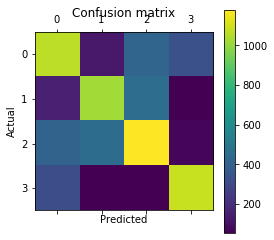

In [40]:
# This is the plot for my confusion matrix
import pylab as plt

%matplotlib inline

plt.matshow(knncm)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [41]:
# The average accuracy score across the test instance is around 60%.
# The average accuracy score across the training instance is around 98.3%, meaning we are overfitting our model.

print(knnclf.score(nyc_test_norm, nyc_target_test))
print(knnclf.score(nyc_train_norm, nyc_target_train))

0.5971232876712329
0.9835257046956879


2nd Model ---- Decision Tree Classfier

In [42]:
# Trying a Decision Tree Classifier.
treeclf = tree.DecisionTreeClassifier(criterion = 'entropy', min_samples_split = 10)

In [43]:
treeclf = treeclf.fit(nyc_train, nyc_target_train)

In [44]:
treepreds_test = treeclf.predict(nyc_test)
print(treepreds_test)

['>1,1M' '< 648K' '< 397K' ... '>1,1M' '< 1.1M' '< 1.1M']


In [45]:
# Determining what the average accuracy is across the test instance using a DTC, which has shown to be a bit better than KNN.
print(treeclf.score(nyc_test, nyc_target_test))

0.5983561643835617


In [46]:
# The train model has an average accuracy of 85.89%.
# This indicates that there is overfitting in my model.
print(treeclf.score(nyc_train, nyc_target_train))

0.8593348631708737


In [47]:
# The weighted average score of my precision across my decision tree model is 60%.
print(classification_report(nyc_target_test, treepreds_test))

              precision    recall  f1-score   support

      < 1.1M       0.54      0.58      0.56      1957
      < 397K       0.61      0.61      0.61      1696
      < 648K       0.56      0.53      0.54      2121
       >1,1M       0.72      0.70      0.71      1526

    accuracy                           0.60      7300
   macro avg       0.61      0.61      0.61      7300
weighted avg       0.60      0.60      0.60      7300



In [48]:
# Confusion Matrix.
treecm = confusion_matrix(nyc_target_test, treepreds_test)
print(treecm)

[[1136  134  376  311]
 [ 154 1028  469   45]
 [ 445  495 1129   52]
 [ 367   30   54 1075]]


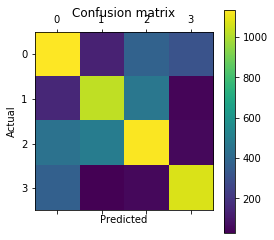

In [49]:
# This is the plot for my confusion matrix.

import pylab as plt

%matplotlib inline

plt.matshow(treecm)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

3rd Model ---- Gaussian Naive Bayers Classifier

In [50]:
# Trying the Gaussian Naive Bayers Classifier against the dataset
nbclf = naive_bayes.GaussianNB()
nbclf = nbclf.fit(nyc_train, nyc_target_train)
nbpreds_test = nbclf.predict(nyc_test)
print(nbpreds_test)

['< 1.1M' '< 1.1M' '< 1.1M' ... '< 1.1M' '< 1.1M' '< 1.1M']


In [51]:
# Compared to my other two models, the score for train is extremely low. 
# Since it is so low, I will not continue with this model.
print(nbclf.score(nyc_train, nyc_target_train))

0.28787204164811453


In [52]:
# The score for test, is also extremely low.
# Since it is so low, I will not continue with this model.
print(nbclf.score(nyc_test, nyc_target_test))

0.283972602739726


In [53]:
print(classification_report(nyc_target_test, nbpreds_test))

              precision    recall  f1-score   support

      < 1.1M       0.28      0.97      0.43      1957
      < 397K       0.29      0.05      0.09      1696
      < 648K       0.03      0.00      0.00      2121
       >1,1M       0.73      0.05      0.10      1526

    accuracy                           0.28      7300
   macro avg       0.33      0.27      0.16      7300
weighted avg       0.30      0.28      0.16      7300



In [54]:
Naive = confusion_matrix(nyc_target_test, nbpreds_test)
print(Naive)

[[1900   51    0    6]
 [1586   89    2   19]
 [2073   41    2    5]
 [1258  128   58   82]]


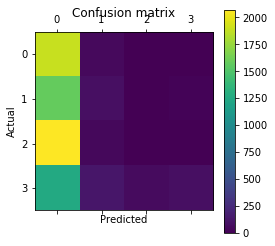

In [55]:
# This is the plot for my confusion matrix
import pylab as plt

%matplotlib inline

plt.matshow(Naive)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

4th Model ---- Linear Discriminant Analysis

In [56]:
# Trying the Linear Discriminant Analysis 
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

ldclf = LinearDiscriminantAnalysis()
ldclf = ldclf.fit(nyc_train, nyc_target_train)
ldpreds_test = ldclf.predict(nyc_test)

print(ldpreds_test)

['>1,1M' '< 648K' '< 648K' ... '>1,1M' '< 1.1M' '< 1.1M']


In [57]:
# The score for my training model is a little bit lower than my Decision Tree, and KNN models.
print(ldclf.score(nyc_train, nyc_target_train))

0.604171661472069


In [58]:
# The score for my testing model is similar to my Decision Tree, and KNN models.
print(ldclf.score(nyc_test, nyc_target_test))

0.5976712328767123


In [59]:
# The weighted average score of precision across my decision tree model is 60%.
print(classification_report(nyc_target_test, ldpreds_test))

              precision    recall  f1-score   support

      < 1.1M       0.54      0.56      0.55      1957
      < 397K       0.66      0.53      0.59      1696
      < 648K       0.55      0.63      0.58      2121
       >1,1M       0.70      0.69      0.69      1526

    accuracy                           0.60      7300
   macro avg       0.61      0.60      0.60      7300
weighted avg       0.60      0.60      0.60      7300



My weighted average score for precision is 60%, which is pretty ok for my test set. This number is similar also to my KNN and Decision Tree model.

In [60]:
LDA = confusion_matrix(nyc_target_test, ldpreds_test)
print(LDA)

[[1095  107  459  296]
 [ 129  894  602   71]
 [ 389  319 1328   85]
 [ 418   27   35 1046]]


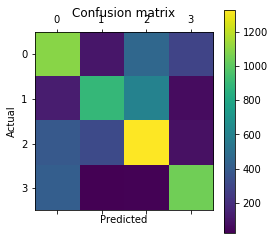

In [61]:
# This is the plot for my confusion matrix.
import pylab as plt
%matplotlib inline
plt.matshow(LDA)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

Unsupervised Learning

In [62]:
# Performing PCA to reduce dimensions in NYC_TRAIN_NORM.
from sklearn import decomposition

In [63]:
# If we used only 1 component then it will explain 82% of the variance in my data.
pca = decomposition.PCA(n_components = 1)
trans = pca.fit(nyc_records_dumm).transform(nyc_records_dumm)
print(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_.sum())

[0.82836759]
0.8283675942567005


In [64]:
# If we used only 2 components then it will explain 99% of the variance in my data.
pca = decomposition.PCA(n_components=2)
trans = pca.fit(nyc_records_dumm).transform(nyc_records_dumm)
print(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_.sum())

[0.82836759 0.16453689]
0.9929044866507339


In [65]:
# We have a total of 36,497 observations, and 2 principal components.
trans.shape

(36497, 2)

In [66]:
# Splitting lower dimensional transformed data into training and test sets.
nyc_train_pca, nyc_test_pca, nyc_target_train_pca, nyc_target_test_pca = train_test_split(
    trans, nyc_target, test_size = 0.2, random_state = 55)

In [67]:
print(nyc_train_pca.shape) # Perfect, this is the amount of variables we were looking for!
print(nyc_test_pca.shape)
print(nyc_target_train_pca.shape)
print(nyc_target_test_pca.shape)

(29197, 2)
(7300, 2)
(29197,)
(7300,)


In [68]:
# Performing K-NN again, but with PCA results.
n_neighbors = 3

knnclf = neighbors.KNeighborsClassifier(n_neighbors, weights='distance')
knnclf.fit(nyc_train_pca, nyc_target_train_pca)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='distance')

In [69]:
# Predicting the testing set target.
knnpreds_test = knnclf.predict(nyc_test_pca)
print(knnpreds_test)

['>1,1M' '< 648K' '< 648K' ... '< 1.1M' '< 648K' '< 1.1M']


In [70]:
print(classification_report(nyc_target_test_pca, knnpreds_test))


              precision    recall  f1-score   support

      < 1.1M       0.43      0.45      0.44      1957
      < 397K       0.54      0.52      0.53      1696
      < 648K       0.46      0.47      0.46      2121
       >1,1M       0.62      0.61      0.61      1526

    accuracy                           0.50      7300
   macro avg       0.51      0.51      0.51      7300
weighted avg       0.50      0.50      0.50      7300



In [71]:
# Using 2 principal components, instead of the 300+ columns, still resulted in good precision of 50% for the test set.

In [72]:
# Using PCA in my Decision Tree to see if this will affect my answer.
from sklearn import tree

treeclf = tree.DecisionTreeClassifier(criterion = 'entropy', min_samples_split = 10)

In [73]:
treeclf = treeclf.fit(nyc_train_pca, nyc_target_train)

In [74]:
treepreds_test = treeclf.predict(nyc_test_pca)
print(treepreds_test)

['>1,1M' '< 1.1M' '< 397K' ... '< 1.1M' '< 1.1M' '< 1.1M']


In [75]:
print(treeclf.score(nyc_test_pca, nyc_target_test))

0.4795890410958904


In [76]:
# The Train model has an average accuracy of 76.1%.
# This indicates that there is overfitting in my model. 
print(treeclf.score(nyc_train_pca, nyc_target_train))

0.760078090214748


Values seems to be lower but it could be because PCA removes the multicollinearity between the variables.The multicollinearity can affect my score by inflating it.

Clustering

In [77]:
from sklearn.cluster import KMeans 

In [78]:
nyc_kmeans = KMeans(n_clusters = 4, max_iter = 500, verbose = 1, n_init = 5) # Initialization
nyc_kmeans.fit(nyc_train_norm)

Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 56565.53289985017
start iteration
done sorting
end inner loop
Iteration 1, inertia 55583.939190280515
start iteration
done sorting
end inner loop
Iteration 2, inertia 55049.95237254773
start iteration
done sorting
end inner loop
Iteration 3, inertia 55049.473788884454
center shift 6.030555e-07 within tolerance 8.642731e-07
Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 57273.70319394693
start iteration
done sorting
end inner loop
Iteration 1, inertia 55711.7020813263
start iteration
done sorting
end inner loop
Iteration 2, inertia 55174.858136313596
start iteration
done sorting
end inner loop
Iteration 3, inertia 55174.37955265032
center shift 6.030555e-07 within tolerance 8.642731e-07
Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 58882.24126619014
start iteration
done sorting
end inner loop
Iteration 1, inertia 55

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=500,
       n_clusters=4, n_init=5, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=1)

In [79]:
c = nyc_kmeans.predict(nyc_test_norm)

In [80]:
c.shape

(7300,)

In [81]:
# Clusters an array of cluster labels for each instance in the data
def cluster_sizes(clusters):    
    size = {}
    cluster_labels = np.unique(clusters)
    n_clusters = cluster_labels.shape[0]

    for c in cluster_labels:
        size[c] = len(nyc_test_norm[clusters == c])

    return size

In [82]:
size = cluster_sizes(c)

for i in size.keys():
    print("Size of Cluster", i, "= ", size[i])

Size of Cluster 0 =  581
Size of Cluster 1 =  2451
Size of Cluster 2 =  2444
Size of Cluster 3 =  1824


In [83]:
nyc_centroids = pd.DataFrame(nyc_kmeans.cluster_centers_, columns = nyc_train_norm.columns)
nyc_centroids

BOROUGH     BLOCK       LOT  ZIP_CODE  RESIDENTIAL_UNITS  COMMERCIAL_UNITS  TOTAL_UNITS  LAND_SQUARE_FEET  GROSS_SQUARE_FEET  YEAR_BUILT  TAX_CLASS_AT_TIME_OF_SALE  New_Sale_Date  NEIGHBORHOOD_AIRPORT LA GUARDIA  NEIGHBORHOOD_ALPHABET CITY  NEIGHBORHOOD_ANNADALE  NEIGHBORHOOD_ARDEN HEIGHTS  NEIGHBORHOOD_ARROCHAR  NEIGHBORHOOD_ARROCHAR-SHORE ACRES  NEIGHBORHOOD_ARVERNE  NEIGHBORHOOD_ASTORIA  NEIGHBORHOOD_BATH BEACH  NEIGHBORHOOD_BATHGATE  NEIGHBORHOOD_BAY RIDGE  NEIGHBORHOOD_BAYCHESTER  NEIGHBORHOOD_BAYSIDE  NEIGHBORHOOD_BEDFORD PARK/NORWOOD  NEIGHBORHOOD_BEDFORD STUYVESANT  NEIGHBORHOOD_BEECHHURST  NEIGHBORHOOD_BELLE HARBOR  NEIGHBORHOOD_BELLEROSE  NEIGHBORHOOD_BELMONT  NEIGHBORHOOD_BENSONHURST  NEIGHBORHOOD_BERGEN BEACH  NEIGHBORHOOD_BOERUM HILL  NEIGHBORHOOD_BOROUGH PARK  NEIGHBORHOOD_BRIARWOOD  NEIGHBORHOOD_BRIGHTON BEACH  NEIGHBORHOOD_BROAD CHANNEL  NEIGHBORHOOD_BRONX PARK  NEIGHBORHOOD_BRONXDALE  NEIGHBORHOOD_BROOKLYN HEIGHTS  NEIGHBORHOOD_BROWNSVILLE  \
0  0.417266  0.308000  0.015729  0.937813           0.001422          0.000044     0.001416          0.000565           0.000992    0.967228               3.333333e-01       0.670414                    -6.247715e-18                7.047314e-19           5.767956e-17                1.621966e-16          -2.970714e-17                       1.122149e-17         -4.597017e-17         -4.839878e-16                 0.002248               0.000450                0.077338                 0.000450          8.153200e-17                           0.013040                    -8.951173e-16            -4.618701e-17               6.071532e-17           -3.556183e-17          2.537033e-17                  0.004496              -2.775558e-17                  0.002698                   0.001799            1.214306e-17                     0.028777               -1.929880e-17                      0.0                0.013939                       0.046313             -1.110223e-16   
1  0.728402  0.395679  0.009833  0.939584           0.000543          0.000043     0.000546          0.000768           0.000413    0.964611               1.620926e-14       0.645408                     9.918667e-05               -3.220080e-17           5.256893e-03                1.458044e-02           1.289427e-03                       9.918667e-04          2.578853e-03          2.876413e-03                 0.001091               0.000397                0.008034                 0.009125          2.261456e-02                           0.001389                     3.372347e-03             3.173973e-03               3.074787e-03            9.720294e-03          1.983733e-04                  0.003967               3.372347e-03                  0.001289                   0.005158            1.884547e-03                     0.001389                2.380480e-03                      0.0                0.005158                       0.000595              3.074787e-03   
2  0.599451  0.327756  0.007062  0.945003           0.001186          0.000081     0.001191          0.000658           0.000608    0.960787               2.440725e-04       0.648849                     1.046025e-04               -2.385245e-17           3.138075e-03                2.405858e-03           5.230126e-04                       2.092050e-04          7.845188e-03          1.359833e-02                 0.006485               0.001674                0.009937                 0.012657          9.309623e-03                           0.004184                     3.368201e-02             4.184100e-04               1.778243e-03            2.405858e-03          1.987448e-03                  0.015481               2.824268e-03                  0.001987                   0.020921            1.359833e-03                     0.001987                1.046025e-04                      0.0                0.007218                       0.000732              5.230126e-03   
3  0.459828  0.193545  0.091124  0.917413           0.002631          0.001546     0.002969 

In [84]:
print (c)

[3 2 1 ... 3 1 2]


In [85]:
print(nyc_target_test)

1075      >1,1M
80719    < 397K
76825    < 397K
44218    < 648K
43469     >1,1M
          ...  
75511    < 397K
18439    < 397K
27823    < 648K
56180    < 1.1M
31828    < 1.1M
Name: New_Sales_Price, Length: 7300, dtype: object


In [90]:
from sklearn.metrics import completeness_score, homogeneity_score, accuracy_score

In [91]:
print(completeness_score(nyc_target_test,c))

0.09180476843929761


In [92]:
print(homogeneity_score(nyc_target_test,c))

0.08530359616270154


In [94]:
print(accuracy_score(nyc_target_test, c))

0.0


##### Both Homogeneity Score and Completeness score are both really low, meaning that performing K-means Clustering for classes that are categorical instead of numerical would not be the best option.


###### In Summary we can see the following table that compares all of my different machine learning algorithms:
    

In [98]:
results = {'Model':['KNN', 'Decision Tree', 'Naive-Bayes', 'Linear Discriminat Analysis', 'KNN-w PCA','K-means'], 
           'Accuracy Score':['0.60', '0.60', '0.30', '0.60', '0.50', '0.00']}

In [99]:
results_df = pd.DataFrame(results, columns = ['Model', 'Accuracy Score'])

In [100]:
print(results_df)

                         Model Accuracy Score
0                          KNN           0.60
1                Decision Tree           0.60
2                  Naive-Bayes           0.30
3  Linear Discriminat Analysis           0.60
4                    KNN-w PCA           0.50
5                      K-means           0.00


###### Based on this table we can see that: KNN, Decision Trees and LDA are the best options for my prediction in real estate price with an accuracy score of 60%. If we used PCA to reduce the dimensionality of the data and re-run our KNN, we will get an accuracy score of 50%. Also, we can also see that K-means is definitely not a good oprtion in this scenario (clusterin) since we are talking about categorical variables instead of numerical values. 